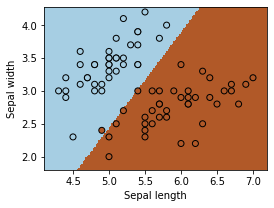

In [2]:
# Binary Linear Classifier

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

# splitpoint = 20
# data = datasets.load_iris()
# training_data = data.data[:splitpoint,:2]
# training_targets = data.target[:splitpoint]

splitlocation = 80

X, y = datasets.load_iris(return_X_y=True)

X = X[:100,:2]
y = y[:100]

setl = train_test_split(X, y, test_size=splitlocation/100, random_state=0)

training_data = setl[0]
training_targets = setl[2]
testing_data = setl[1]
testing_targets = setl[3]

blc = LogisticRegression()
blc.fit(training_data, training_targets)

x_min = training_data[:,0].min()-0.5
x_max = training_data[:,0].max()+0.5
y_min = training_data[:,1].min()-0.5
y_max = training_data[:,1].max()+0.5

# abs_min = np.array([x_min,y_min]).min()
# abs_max = np.array([x_max,y_max]).max()

step = 0.02
#values = np.arange(abs_min,abs_max,step)
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
#Z = blc.predict(np.c_[values,values])
Z = blc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4,3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plotting training points
# plt.scatter(training_data[:,0], training_data[:,1], c=training_targets, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(testing_data[:,0], testing_data[:,1], c=testing_targets, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, svm

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

splitlocation = 80



X, y = datasets.load_iris(return_X_y=True)

X = X[:100,:2]
y = y[:100]

setp = train_test_split(X, y, test_size=0.8, random_state=0)

training_data = setp[0]
training_targets = setp[2]
testing_data = setp[1]
testing_targets = setp[3]

print(f'{len(training_data)}\n{len(training_targets)}\n{len(testing_data)}\n{len(testing_targets)}')

20
20
80
80


Offset: 0.29999160820412285
Intercept: -2.298769231324805


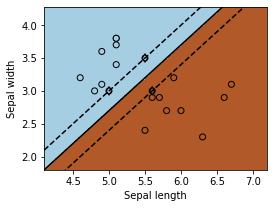

In [8]:
# Linear SVM Classifier

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, svm

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# splitlocation = 80



# X, y = datasets.load_iris(return_X_y=True)

# _ = train_test_split(X, y, test_size=0.8, random_state=0)

# training_data = _[0]
# training_targets = _[1]

# training_data = data.data[:splitlocation,:2]
# training_targets = data.target[:splitlocation]


splitlocation = 80



X, y = datasets.load_iris(return_X_y=True)

X = X[:100,:2]
y = y[:100]

setq = train_test_split(X, y, test_size=splitlocation/100, random_state=0)

training_data = setq[0]
training_targets = setq[2]
testing_data = setq[1]
testing_targets = setq[3]

# clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf = svm.SVC(kernel="linear", C=100)
clf.fit(training_data, training_targets)



x_min = training_data[:,0].min()-0.5
x_max = training_data[:,0].max()+0.5
y_min = training_data[:,1].min()-0.5
y_max = training_data[:,1].max()+0.5

# abs_min = np.array([x_min,y_min]).min()
# abs_max = np.array([x_max,y_max]).max()

step = 0.02
#values = np.arange(abs_min,abs_max,step)
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
#Z = clf.predict(np.c_[values,values])
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4,3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plotting training points
# plt.scatter(testing_data[:,0], testing_data[:,1], c=testing_targets, edgecolors="k", marker="o", cmap=plt.cm.Paired)
plt.scatter(training_data[:,0], training_data[:,1], c=training_targets, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


# Retrieve Coefficient Values
coefs = clf.coef_

# Determine vertical offset of margins
d = 1 / l2_norm(coefs[0])
slope = -(coefs[0][0]/coefs[0][1])

offset = d * np.power(1+np.power(slope,2), 1/2)

intercept = -clf.intercept_[0]/clf.coef_[0][1]

print(f'Offset: {offset}')
print(f'Intercept: {intercept}')

# # Plot line
xline = np.linspace(x_min,x_max,50)
yline = slope*xline + intercept
plt.plot(xline,yline, 'k', label='Decision Boundary')

xline = np.linspace(x_min,x_max,50)
yline = slope*xline + intercept + offset
plt.plot(xline,yline, 'k--')

xline = np.linspace(x_min,x_max,50)
yline = slope*xline + intercept - offset
plt.plot(xline,yline, 'k--', label='Margin')

plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], edgecolors='k', facecolors='none' ,marker='d', label='Support Vectors')

# plt.legend()

plt.show()


In [7]:
def l2_norm(a):
  sum = 0
  for i in a:
    sum += np.power(i,2)

  return np.power(sum, 1/2)

def l1_norm(a):
  sum = 0
  for i in a:
    sum += i

  return sum

In [ ]:


splitlocation8 = 80
splitlocation4 = 40

X, y = datasets.load_iris(return_X_y=True)

X = X[:100,:2]
y = y[:100]

# Create sets for 0.8
_ = train_test_split(X, y, test_size=splitlocation8/100, random_state=0)

training_data8 = _[0]
training_targets8 = _[2]
testing_data8 = _[1]
testing_targets8 = _[3]

# Create sets for 0.4
_ = train_test_split(X, y, test_size=splitlocation4/100, random_state=0)

training_data4 = _[0]
training_targets4 = _[2]
testing_data4 = _[1]
testing_targets4 = _[3]

clf8 = svm.SVC(kernel="linear", C=100)
clf8.fit(training_data8, training_targets8)
clf4 = svm.SVC(kernel="linear", C=100)
clf4.fit(training_data4, training_targets4)

# Retrieve Coefficient Values
coefs8 = clf8.coef_
coefs4 = clf4.coef_
coefs = blc.coef_

# Determine vertical offset of margins
d8 = 1 / l2_norm(coefs8[0])
slope8 = -(coefs8[0][0]/coefs8[0][1])
d4 = 1 / l2_norm(coefs4[0])
slope4 = -(coefs4[0][0]/coefs4[0][1])
d = 1 / l2_norm(coefs[0])
slope = -(coefs[0][0]/coefs[0][1])


intercept8 = -clf8.intercept_[0]/clf8.coef_[0][1]
intercept4 = -clf4.intercept_[0]/clf4.coef_[0][1]
intercept = -blc.intercept_[0]/blc.coef_[0][1]

xline = np.linspace(x_min,x_max,50)
y8line = slope8*xline + intercept8
y4line = slope4*xline + intercept4
yline = slope*xline + intercept
plt.plot(xline,y8line, 'k', label='SVM test_size=0.8')
plt.plot(xline,y4line, 'b', label='SVM test_size=0.4')
plt.plot(xline,yline, 'r', label='Binary Linear test_size=0.8')

# 0.8
# offset = d8 * np.power(1+np.power(slope8,2), 1/2)
# yline = slope8*xline + intercept8 + offset
# plt.plot(xline,yline, 'k--')

# yline = slope8*xline + intercept8 - offset
# plt.plot(xline,yline, 'k--', label='Margin')

# 0.4
# offset = d4 * np.power(1+np.power(slope4,2), 1/2)
# yline = slope4*xline + intercept4 + offset
# plt.plot(xline,yline, 'k--')

# yline = slope4*xline + intercept4 - offset
# plt.plot(xline,yline, 'k--', label='Margin')
plt.legend()

plt.show()

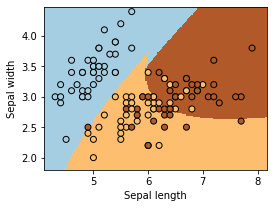

In [ ]:
# All 150 Points

# Linear SVM Classifier

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, svm

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# splitlocation = 80



# X, y = datasets.load_iris(return_X_y=True)

# _ = train_test_split(X, y, test_size=0.8, random_state=0)

# training_data = _[0]
# training_targets = _[1]

# training_data = data.data[:splitlocation,:2]
# training_targets = data.target[:splitlocation]


splitlocation = 80



X, y = datasets.load_iris(return_X_y=True)

X = X[:,:2]

_ = train_test_split(X, y, test_size=splitlocation/100, random_state=0)

training_data = _[0]
training_targets = _[2]
testing_data = _[1]
testing_targets = _[3]

# clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf = svm.SVC(kernel="poly", C=100)
clf.fit(training_data, training_targets)



x_min = training_data[:,0].min()-0.5
x_max = training_data[:,0].max()+0.5
y_min = training_data[:,1].min()-0.5
y_max = training_data[:,1].max()+0.5

# abs_min = np.array([x_min,y_min]).min()
# abs_max = np.array([x_max,y_max]).max()

step = 0.02
#values = np.arange(abs_min,abs_max,step)
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
#Z = clf.predict(np.c_[values,values])
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4,3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plotting training points
plt.scatter(testing_data[:,0], testing_data[:,1], c=testing_targets, edgecolors="k", marker="o", cmap=plt.cm.Paired)
# plt.scatter(training_data[:,0], training_data[:,1], c=training_targets, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


# # Retrieve Coefficient Values
# coefs = clf.coef_

# # Determine vertical offset of margins
# d = 1 / l2_norm(coefs[0])
# slope = -(coefs[0][0]/coefs[0][1])

# offset = d * np.power(1+np.power(slope,2), 1/2)

# intercept = -clf.intercept_[0]/clf.coef_[0][1]

# print(f'Offset: {offset}')
# print(f'Intercept: {intercept}')

# # # Plot line
# xline = np.linspace(x_min,x_max,50)
# yline = slope*xline + intercept
# plt.plot(xline,yline, 'k', label='Decision Boundary')

# xline = np.linspace(x_min,x_max,50)
# yline = slope*xline + intercept + offset
# plt.plot(xline,yline, 'k--')

# xline = np.linspace(x_min,x_max,50)
# yline = slope*xline + intercept - offset
# plt.plot(xline,yline, 'k--', label='Margin')

# plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], edgecolors='k', facecolors='none' ,marker='d', label='Support Vectors')

# plt.legend()

plt.show()


In [10]:
Z

array([[1, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [11]:
d*2

0.9130614888074922